In [1]:
#Importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from __future__ import division, print_function
%matplotlib inline

In [2]:
#Importing dataset and preprocessing:

dataframe = pd.read_csv('Hawks.csv')
print(dataframe)

    Species   Wing  Weight  Tail
0        RT  385.0   920.0   219
1        RT  376.0   930.0   221
2        RT  381.0   990.0   235
3        CH  265.0   470.0   220
4        SS  205.0   170.0   157
..      ...    ...     ...   ...
903      RT  380.0  1525.0   224
904      SS  190.0   175.0   150
905      RT  360.0   790.0   211
906      RT  369.0   860.0   207
907      RT  199.0  1290.0   222

[908 rows x 4 columns]


In [3]:
#Checking for dublicate values:
dups = dataframe.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(dataframe[dups])

True
    Species   Wing  Weight  Tail
332      RT  368.0  1244.0   220
430      SS  202.0   180.0   160


In [4]:
#Deleting the dublicate values:
dataframe.drop_duplicates(inplace=True)

In [5]:
#Checking for null values if any:
print(dataframe.isnull().sum())

Species     0
Wing        1
Weight     10
Tail        0
dtype: int64


In [6]:
# Deleting the rows that has null values:
df = dataframe.dropna()

In [7]:
print(df)
print(df.isnull().sum())

    Species   Wing  Weight  Tail
0        RT  385.0   920.0   219
1        RT  376.0   930.0   221
2        RT  381.0   990.0   235
3        CH  265.0   470.0   220
4        SS  205.0   170.0   157
..      ...    ...     ...   ...
903      RT  380.0  1525.0   224
904      SS  190.0   175.0   150
905      RT  360.0   790.0   211
906      RT  369.0   860.0   207
907      RT  199.0  1290.0   222

[895 rows x 4 columns]
Species    0
Wing       0
Weight     0
Tail       0
dtype: int64


In [8]:
#Creating Training and Testing sets for Evaluation:

x = df.iloc[:, [1,3]].values
y_code = df.iloc[:, 0].values
y = []
for i in y_code:
    
    if i == 'RT':
        y.append(0)
    elif i == 'SS':
        y.append(1)
    else:
        y.append(2)
#df['Species'].unique()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [9]:
#Creating Function for the evaluation of the three models:

def evalOnTestData(model = None):
    predictions = model.predict(X_test)
      correction_classifications = 0
    for i in range(len(y_test)):
    if predictions[i] == y_test[i]:
        correction_classifications += 1
    accuracy = (100*correction_classifications)/(len(y_test))
    return accuracy

In [10]:
#Accuracies obtained using different models:

kernels = ['linear', 'poly', 'rbf']
accuracies = []
for i in range(len(kernels)):
    model = svm.SVC(kernel = kernels[i])
    model.fit(X_train, y_train)
    acc = evalOnTestData(model)
    accuracies.append(acc)
    print("Kernel =", kernels[i])
    print("Accuracy obtained :", acc)
    print()

Kernel = linear
Accuracy obtained : 97.76536312849161

Kernel = poly
Accuracy obtained : 97.20670391061452

Kernel = rbf
Accuracy obtained : 97.76536312849161



In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

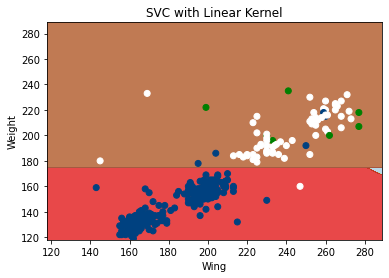

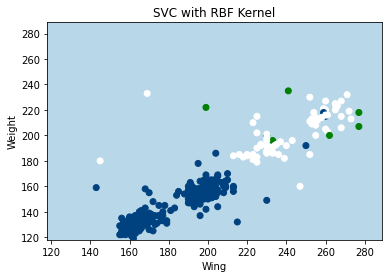

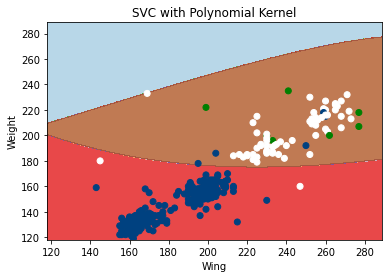

In [11]:
#Visualization of various kernels:
svc = svm.SVC(kernel = 'linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7).fit(X_train, y_train)
poly_svc = svm.SVC(kernel = 'poly', degree = 3).fit(X_train, y_train)

#Creating a mesh plot:
h = 0.2;
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['SVC with Linear Kernel', 'SVC with RBF Kernel', 'SVC with Polynomial Kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
  plt.figure(i)
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)

  plt.contourf(xx, yy, z, cmap = plt.cm.Paired, alpha = 0.8)

  plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.ocean)
  plt.xlabel('Wing')
  plt.ylabel('Weight')
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())
  # plt.xticks(())
  # plt.yticks(())
  plt.title(titles[i])

plt.show()